# 셀프 주유소는 정말 저렴할까

## 4.1 Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../chromedriver')
driver.get("http://www.yes24.com")

In [3]:
driver.save_screenshot('../output/001.png')

True

In [4]:
driver.get("https://www.yes24.com/Templates/FTLogin.aspx")
elem_login = driver.find_element_by_id("SMemberID")
elem_login.clear()
elem_login.send_keys("phsu2021")

elem_login = driver.find_element_by_id("SMemberPassword")
elem_login.clear()
elem_login.send_keys("56tnthd!!") #자신의 비번을 넣으세요

In [5]:
xpath = '//*[@id="btnLogin"]'
driver.find_element_by_xpath(xpath).click()

In [6]:
driver.get("https://www.yes24.com/Member/MyPage_reconfirmPW.aspx")

In [7]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
raw_list = soup.select('#CLabMemId')
raw_list

[<span id="CLabMemId">phsu2021</span>]

In [9]:
send_list = [raw_list[n].string for n in range(0, len(raw_list))]
send_list

['phsu2021']

In [10]:
driver.close()

## 4-2 서울시 구별 주유소 가격 정보 얻기

In [11]:
import time

driver = webdriver.Chrome('../chromedriver')
driver.get("http://www.opinet.co.kr/")
time.sleep(2)
driver.get("http://www.opinet.co.kr/searRgSelect.do")
time.sleep(2)

In [12]:
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys('서울')
time.sleep(2)

In [13]:
# //*[@id="SIGUNGU_NM0"]
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [14]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [15]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [16]:
xpath = '//*[@id="searRgSelect"]'
element_sel_gu = driver.find_element_by_xpath(xpath).click()
time.sleep(2)

In [17]:
xpath = '//*[@id="glopopd_excel"]'
element_get_excel = driver.find_element_by_xpath(xpath).click()

## tqdm 모듈 : 상태 진행바 생성

- Jupyter Notebook에서 상태 진행바를 쉽게 만들어준다.
- 퍼센트 현작업갯수/총작업갯수 [작업시간/남은시간 iteration당 작업초]
- pip install tqdm

In [18]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(5)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(5)

In [19]:
driver.close()

## 4-5. 구별 주유 가격에 대한 데이터의 정리

In [20]:
import pandas as pd
from glob import glob

In [21]:
glob('../data/지역_위치별*.xls')

['../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (3).xls']

In [22]:
stations_files = glob('../data/지역_위치별*.xls')
stations_files

['../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (3).xls']

In [23]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [24]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 12
Data columns (total 10 columns):
지역       478 non-null object
상호       478 non-null object
주소       478 non-null object
상표       478 non-null object
전화번호     478 non-null object
셀프여부     478 non-null object
고급휘발유    478 non-null object
휘발유      478 non-null object
경유       478 non-null object
실내등유     478 non-null object
dtypes: object(10)
memory usage: 41.1+ KB


In [25]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,성산주유소,서울 마포구 월드컵북로 170 (성산제2동),SK에너지,02-373-3314,N,-,1577,1457,-
1,서울특별시,마포시엠주유소,서울 마포구 월드컵북로62 (성산동),GS칼텍스,02-336-1687,N,-,1587,1457,-
2,서울특별시,청원주유소,서울 마포구 월드컵북로 113 (성산동),현대오일뱅크,02-325-5533,N,2028,1598,1498,-
3,서울특별시,용강주유소,서울 마포구 토정로 258,S-OIL,070-7795-4800,N,-,1639,1499,-
4,서울특별시,(주)만성상사(대흥),서울 마포구 대흥로 61 (대흥동),SK에너지,02-3273-5151,N,2129,1666,1521,-


In [26]:
station_raw.shape

(478, 10)

In [27]:
stations = pd.DataFrame(
    {'Oil_store':station_raw['상호'], 
     '주소':station_raw['주소'],
     '가격':station_raw['휘발유'],
     '셀프':station_raw['셀프여부'],
     '상표':station_raw['상표']  
    })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,성산주유소,서울 마포구 월드컵북로 170 (성산제2동),1577,N,SK에너지
1,마포시엠주유소,서울 마포구 월드컵북로62 (성산동),1587,N,GS칼텍스
2,청원주유소,서울 마포구 월드컵북로 113 (성산동),1598,N,현대오일뱅크
3,용강주유소,서울 마포구 토정로 258,1639,N,S-OIL
4,(주)만성상사(대흥),서울 마포구 대흥로 61 (대흥동),1666,N,SK에너지


In [28]:
stations['구'] = [eachAddress.split()[1] 
          for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,성산주유소,서울 마포구 월드컵북로 170 (성산제2동),1577,N,SK에너지,마포구
1,마포시엠주유소,서울 마포구 월드컵북로62 (성산동),1587,N,GS칼텍스,마포구
2,청원주유소,서울 마포구 월드컵북로 113 (성산동),1598,N,현대오일뱅크,마포구
3,용강주유소,서울 마포구 토정로 258,1639,N,S-OIL,마포구
4,(주)만성상사(대흥),서울 마포구 대흥로 61 (대흥동),1666,N,SK에너지,마포구


In [29]:
stations['구'].unique()

array(['마포구', '동대문구', '강남구', '성북구', '강동구', '구로구', '양천구', '강서구', '관악구',
       '서대문구', '성동구', '광진구', '동작구', '노원구', '영등포구', '금천구', '송파구', '서초구',
       '도봉구', '강북구'], dtype=object)

In [30]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [31]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['마포구', '동대문구', '강남구', '성북구', '강동구', '구로구', '양천구', '강서구', '관악구',
       '서대문구', '성동구', '광진구', '동작구', '노원구', '영등포구', '금천구', '송파구', '서초구',
       '도봉구', '강북구'], dtype=object)

In [32]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구


In [33]:
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['마포구', '동대문구', '강남구', '성북구', '강동구', '구로구', '양천구', '강서구', '관악구',
       '서대문구', '성동구', '광진구', '동작구', '노원구', '영등포구', '금천구', '송파구', '서초구',
       '도봉구', '강북구'], dtype=object)

In [34]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
11,망원동주유소,서울 마포구 월드컵로 119 (망원동),-,N,SK에너지,마포구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
13,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
22,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
25,현대오일뱅크(주)직영 양천셀프주유소,서울 양천구 목동로 17 (신정동),-,Y,현대오일뱅크,양천구


In [35]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,성산주유소,서울 마포구 월드컵북로 170 (성산제2동),1577,N,SK에너지,마포구
1,마포시엠주유소,서울 마포구 월드컵북로62 (성산동),1587,N,GS칼텍스,마포구
2,청원주유소,서울 마포구 월드컵북로 113 (성산동),1598,N,현대오일뱅크,마포구
3,용강주유소,서울 마포구 토정로 258,1639,N,S-OIL,마포구
4,(주)만성상사(대흥),서울 마포구 대흥로 61 (대흥동),1666,N,SK에너지,마포구


In [36]:
stations['가격'] = [float(value) 
                  for value in stations['가격']]

#stations['가격'] = stations['가격'].astype(float)

In [37]:
stations.reset_index(inplace=True)
del stations['index']

In [38]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 6 columns):
Oil_store    469 non-null object
주소           469 non-null object
가격           469 non-null float64
셀프           469 non-null object
상표           469 non-null object
구            469 non-null object
dtypes: float64(1), object(5)
memory usage: 22.1+ KB


In [39]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,성산주유소,서울 마포구 월드컵북로 170 (성산제2동),1577.0,N,SK에너지,마포구
1,마포시엠주유소,서울 마포구 월드컵북로62 (성산동),1587.0,N,GS칼텍스,마포구
2,청원주유소,서울 마포구 월드컵북로 113 (성산동),1598.0,N,현대오일뱅크,마포구
3,용강주유소,서울 마포구 토정로 258,1639.0,N,S-OIL,마포구
4,(주)만성상사(대흥),서울 마포구 대흥로 61 (대흥동),1666.0,N,SK에너지,마포구


## 4-4 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

plt.rcParams["font.family"] = 'D2Coding'

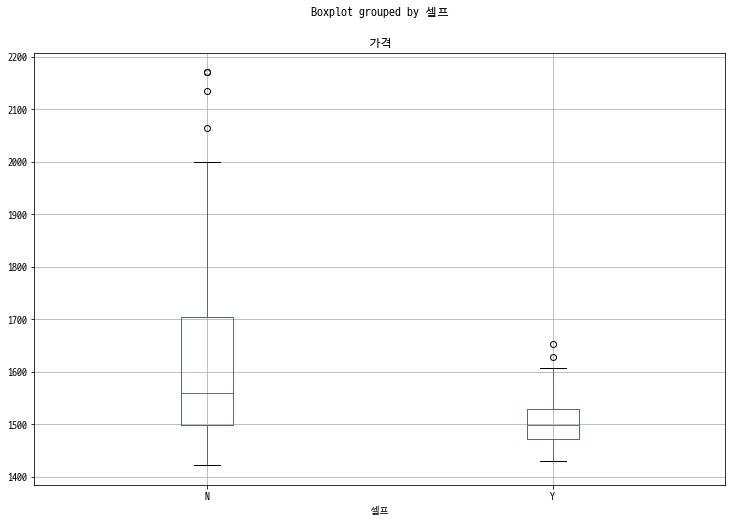

In [41]:
stations.boxplot(column='가격', by='셀프', 
                 figsize=(12,8));

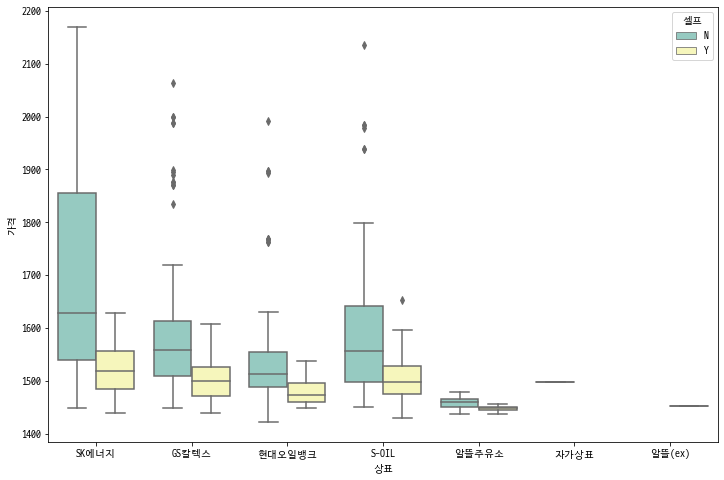

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", 
            data=stations, palette="Set3")
plt.show()

In [43]:
len(stations[stations['상표'] == '알뜰주유소'])

10

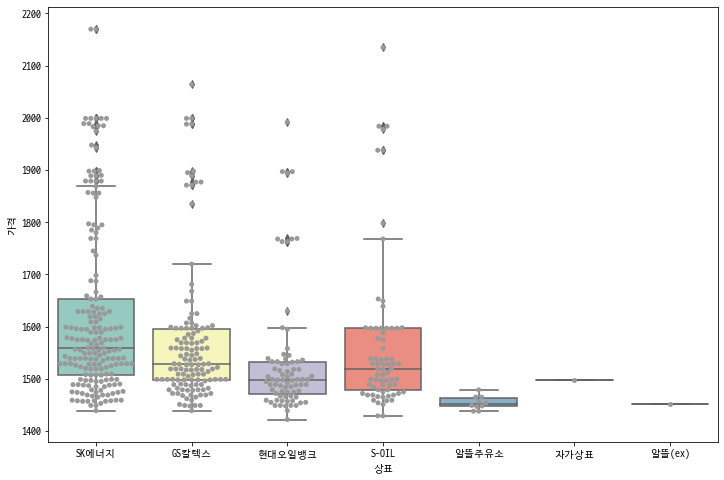

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations,
            palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, 
              color=".6")
plt.show()

## 4-5 서울시 구별 주유 가격 확인하기

In [45]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [46]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
134,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
72,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
94,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구
172,구로주유소,서울 구로구 구로동로 137 (구로동),2064.0,N,GS칼텍스,구로구
71,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구
436,사평로주유소,서울 서초구 사평대로 350 (서초동),1999.0,N,SK에너지,서초구
133,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999.0,N,SK에너지,강남구
132,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구
131,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구
70,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구


In [47]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
456,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구
457,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구
173,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구
198,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1438.0,Y,알뜰주유소,강서구
199,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1438.0,N,알뜰주유소,강서구
176,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구
175,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1439.0,Y,GS칼텍스,양천구
174,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구
177,양천구주유소,서울 양천구 국회대로 275 (목동),1447.0,Y,알뜰주유소,양천구
151,현대오일뱅크㈜직영 구로셀프주유소,서울 구로구 시흥대로 531,1448.0,Y,현대오일뱅크,구로구


In [48]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1737.500000
강동구,1583.875000
강북구,1469.307692
강서구,1509.470588
관악구,1542.312500


In [50]:
geo_path = '../data/07_seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.properties.SIG_KOR_NM')
map

## 4-6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [51]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
134,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
72,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
94,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구
172,구로주유소,서울 구로구 구로동로 137 (구로동),2064.0,N,GS칼텍스,구로구
71,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구
436,사평로주유소,서울 서초구 사평대로 350 (서초동),1999.0,N,SK에너지,서초구
133,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999.0,N,SK에너지,강남구
132,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구
131,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구
70,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구


In [52]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
456,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구
457,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구
173,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구
198,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1438.0,Y,알뜰주유소,강서구
199,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1438.0,N,알뜰주유소,강서구
176,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구
175,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1439.0,Y,GS칼텍스,양천구
174,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구
177,양천구주유소,서울 양천구 국회대로 275 (목동),1447.0,Y,알뜰주유소,양천구
151,현대오일뱅크㈜직영 구로셀프주유소,서울 구로구 시흥대로 531,1448.0,Y,현대오일뱅크,구로구


In [53]:
gmap_key = "API_KEY" # 2장에서 구한 자신의 key를 입력
gmaps = googlemaps.Client(key=gmap_key)

In [54]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
134,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구,37.517636,127.035756
72,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구,37.517636,127.035756
94,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구,37.587908,127.005575
172,구로주유소,서울 구로구 구로동로 137 (구로동),2064.0,N,GS칼텍스,구로구,37.490737,126.883519
71,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구,37.511513,127.047093
436,사평로주유소,서울 서초구 사평대로 350 (서초동),1999.0,N,SK에너지,서초구,37.503247,127.021503
133,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999.0,N,SK에너지,강남구,37.513458,127.053786
132,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,GS칼텍스,강남구,37.511513,127.047093
131,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구,37.509878,127.065101
70,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,SK에너지,강남구,37.509878,127.065101


In [55]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
456,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구,37.631582,127.017939
457,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구,37.640155,127.017203
173,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구,37.533811,126.829240
198,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1438.0,Y,알뜰주유소,강서구,37.540657,126.841506
199,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1438.0,N,알뜰주유소,강서구,37.531820,126.855564
176,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구,37.528087,126.832981
175,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1439.0,Y,GS칼텍스,양천구,37.538552,126.826928
174,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구,37.531003,126.831022
177,양천구주유소,서울 양천구 국회대로 275 (목동),1447.0,Y,알뜰주유소,양천구,37.530283,126.865529
151,현대오일뱅크㈜직영 구로셀프주유소,서울 구로구 시흥대로 531,1448.0,Y,현대오일뱅크,구로구,37.480898,126.899301


In [56]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map